Link dashboard visualisasi project

https://public.tableau.com/app/profile/arief.wicaksono1227/viz/Book1_17321645170890/Dashboard1?publish=yes

<h1>1. Perkenalan</h1>

Nama  : Arief Joko Wicaksono<br>

Notebook ini digunakan untuk menganalisa data kunjungan wisatawan di Yogyakarta. Dalam proses analisa dilakukan langkah-langkah mendefinisakn masalah, load data, cleaning, perhitungan, analisa, dan menarik kesimpulan

<h1>2. Identifikasi Masalah</h1>

<h2>A. Mendefiniskan Masalah</h2>

**Latar belakang:** Daerah Istimewa Yogyakarta merupakan provinsi yang menjadi salah satu destinasi tujuan wisata di Pulau Jawa. Terbagi menjadi menjadi empat Kabupaten dan satu Kota dengan keberagaman kondisi geografis dan kekayaan budaya membuat potensi pariwisata di Provinsi D.I. Yogyakarta sangat besar. Pegunungan Kars, Luat, Lereng gunung berapi, Hutan dan cagar alam, bangunan sejarah, karifan lokal merupakan beberapa potensi wisata yang dapat dikembangkan dengan pengelolaan yang baik.<br><br>
**Tujuan:** Mengoptimalkan semua potensi wisata yang ada dengan melakukan evaluasi supaya dapat semakin menarik wisatawan berkunjung untuk meningkatkan perekonomian daerah dan menambah pendapatan daerah.<br><br>
**Problem Statement:** Meningkatkan kunjungan wisatawan dengan peningkatan kualitas dan kuantitas tempat wisata sesuai pola wisatawan.

**SMART** framework:<br><br>
* **Specific:** Meningkatkan kunjungan wisatawan di setiap kategori tempat wisata.<br>
* **Measurable:** Jika terdapat kategori yang memiliki kunjungan signifikan lebih rendah daripada yang lain maka akan ditargetkan naik sebesar 200%. Dan untuk setiap kategeri lainnya ditargetkan mengalami peningkatan kunjungan sebesar 50%.<br>
* **Achievable:** Menambah lokasi, menambah fasilitas pendukung wisatawan, meningkatkan pelayanan, dan marketing.<br>
* **Relevant:** Kenyamanan dan kemudahan akses lokasi wisata dapat memberikan penilaian positif wisatawan sehingga membantu menaikkan kunjungan wisatawan.<br>
* **Time-Bound:** Target untuk meningkatkan pengunjung dapat tercapai dalam waktu enam bulan.


Meningkatkan kunjungan wisatawan sebesar 200% untuk kategori yang sangat rendah tingkat kunjungannya dan 60% untuk kategori keseluruhan dalam kurun waktu enam bulan kedepan. Menambah lokasi, meningkatkan pelayanan dan fasilitas untuk kenyamanan dan kemudahan akses wisatawan sehingga meningkatkan kepuasan wisatawan.

<h2>B. Penjabaran Masalah</h2>

* Hal apa yang mempengaruhi banyaknya kunjungan wisatawan?<br>
* Wisatawan dari mana yang banyak melakukan kunjungan?<br>
* Bagaimana persebaran kunjungan wisatawan disetiap kategori?<br>
* Berapa jumlah tempat wisata setiap kategori?<br>
* Apakah terdapat karakteristik wisatawan yang spesifik di setiap kategori tempat?<br>
* Di mana saja tempat wisata yang memiliki kunjungan 5 tertinggi dan 5 terendah?


<h1>3. Data Loading</h1>

a. Import library dan modul

In [46]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

b.  Load data ke dataframe dengan pandas

In [47]:
df_place = pd.read_csv('tour.csv')
df_place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Latitude,Longitude
0,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
1,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
2,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
3,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ???????...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
4,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


In [48]:
df_rating = pd.read_csv('tour_rating.csv')
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,101,4
1,1,154,2
2,1,103,3
3,1,208,5
4,1,89,3


In [49]:
df_user = pd.read_csv('user.csv')
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20.0
1,2,"Bekasi, Jawa Barat",21.0
2,3,"Cirebon, Jawa Barat",23.0
3,4,"Bekasi, Jawa Barat",21.0
4,5,"Lampung, Sumatera Selatan",20.0


<h1>4. Data Cleaning</h1>

In [50]:
df_user['Age'] = df_user['Age'].astype('int64')

In [51]:
df_place = df_place.drop(columns=['Description', 'Time_Minutes', 'Coordinate'])

In [52]:
jumlah_pengunjung = df_rating.groupby('Place_Id').agg({'User_Id':'count'})

In [53]:
df_place = df_place.merge(jumlah_pengunjung.rename(columns={'User_Id': 'num_visitors'}),on='Place_Id',how='left')

In [54]:
def haversine(lat1, lon1, lat2, lon2):
    # Konversi derajat ke radian
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Rumus Haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371  # Jari-jari bumi dalam kilometer
    return c * r

In [55]:
lat_lokasi = -7.801382085066955
lon_lokasi = 110.3647670199908
df_place['Distance'] = df_place.apply(lambda row: haversine(lat_lokasi, lon_lokasi, row['Latitude'], row['Longitude']), axis=1)

In [56]:
df_place.head()

,Place_Id,Place_Name,Category,City,Price,Rating,Latitude,Longitude,num_visitors,Distance
0,85,Taman Pintar Yogyakarta,Taman Hiburan,Yogyakarta,6000,4.5,-7.800671,110.367655,25,0.327832
1,86,Keraton Yogyakarta,Budaya,Yogyakarta,15000,4.6,-7.805284,110.364203,25,0.438353
2,87,Sindu Kusuma Edupark (SKE),Taman Hiburan,Yogyakarta,20000,4.2,-7.767297,110.354249,19,3.963253
3,88,Museum Benteng Vredeburg Yogyakarta,Budaya,Yogyakarta,3000,4.6,-7.800202,110.366304,32,0.214279
4,89,De Mata Museum Jogja,Budaya,Yogyakarta,50000,4.4,-7.816316,110.387144,31,2.972264


In [57]:
df_user[['Kota', 'Provinsi']] = df_user['Location'].str.split(',', expand=True)
df_user.drop(columns=['Location'], inplace= True)
df_user.head()

,User_Id,Age,Kota,Provinsi
0,1,20,Semarang,Jawa Tengah
1,2,21,Bekasi,Jawa Barat
2,3,23,Cirebon,Jawa Barat
3,4,21,Bekasi,Jawa Barat
4,5,20,Lampung,Sumatera Selatan


In [58]:
df_rating = df_rating.merge(df_user[['User_Id', 'Age','Kota', 'Provinsi']], on = 'User_Id', how = 'left')
df_rating = df_rating.merge(df_place[['Place_Id','Category']], on = 'Place_Id', how = 'left')

In [59]:
df_rating.head()

,User_Id,Place_Id,Place_Ratings,Age,Kota,Provinsi,Category
0,1,101,4,20,Semarang,Jawa Tengah,Budaya
1,1,154,2,20,Semarang,Jawa Tengah,Bahari
2,1,103,3,20,Semarang,Jawa Tengah,Taman Hiburan
3,1,208,5,20,Semarang,Jawa Tengah,Cagar Alam
4,1,89,3,20,Semarang,Jawa Tengah,Budaya


In [60]:
df_place.describe()

,Place_Id,Price,Rating,Latitude,Longitude,num_visitors,Distance
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,147.500000,19456.349206,4.466667,-7.890662,110.423022,22.777778,20.688564
std,36.517119,55219.055401,0.173897,0.166461,0.140273,4.941075,17.049150
min,85.000000,0.000000,4.000000,-8.197894,110.019826,12.000000,0.000282
25%,116.250000,2500.000000,4.400000,-8.011420,110.363687,20.000000,4.218735
50%,147.500000,5000.000000,4.500000,-7.816139,110.416944,22.000000,18.042271
75%,178.750000,10000.000000,4.600000,-7.793766,110.492845,25.000000,32.758259
max,210.000000,500000.000000,5.000000,-7.582920,110.720854,39.000000,59.002845


In [61]:
df_rating.describe()

,User_Id,Place_Id,Place_Ratings,Age
count,2870.000000,2870.000000,2870.000000,2870.000000
mean,152.132056,147.662021,3.104530,28.875958
std,86.489316,36.950298,1.394187,6.314568
min,1.000000,85.000000,1.000000,18.000000
25%,78.000000,115.000000,2.000000,24.000000
50%,153.000000,149.000000,3.000000,29.000000
75%,227.000000,179.000000,4.000000,34.000000
max,300.000000,210.000000,5.000000,40.000000


In [62]:
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Category      126 non-null    object 
 3   City          126 non-null    object 
 4   Price         126 non-null    int64  
 5   Rating        126 non-null    float64
 6   Latitude      126 non-null    float64
 7   Longitude     126 non-null    float64
 8   num_visitors  126 non-null    int64  
 9   Distance      126 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 10.0+ KB


In [63]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        2870 non-null   int64 
 1   Place_Id       2870 non-null   int64 
 2   Place_Ratings  2870 non-null   int64 
 3   Age            2870 non-null   int64 
 4   Kota           2870 non-null   object
 5   Provinsi       2870 non-null   object
 6   Category       2870 non-null   object
dtypes: int64(4), object(3)
memory usage: 157.1+ KB


<h1>5. Analisis dan perhitungan</h1>

In [64]:
mean_visitors = df_place['num_visitors'].mean()
median_visitors = df_place['num_visitors'].median()
modus_visitors =  df_place['num_visitors'].mode()[0]

print(f'Rata-rata pengunjung = {mean_visitors: .2f}')
print(f'Median pengunjung = {median_visitors: .2f}')
print(f'Modus pengunjung = {modus_visitors: .2f}')

Rata-rata pengunjung =  22.78
Median pengunjung =  22.00
Modus pengunjung =  22.00


In [65]:
skewn_visitors = df_place['num_visitors'].skew()
kurtosis_visitors = df_place['num_visitors'].kurtosis()

print(f'Skewness visitors : {skewn_visitors: .2f}')
print(f'Kurtosis visitors : {kurtosis_visitors: .2f}')

Skewness visitors :  0.60
Kurtosis visitors :  0.73


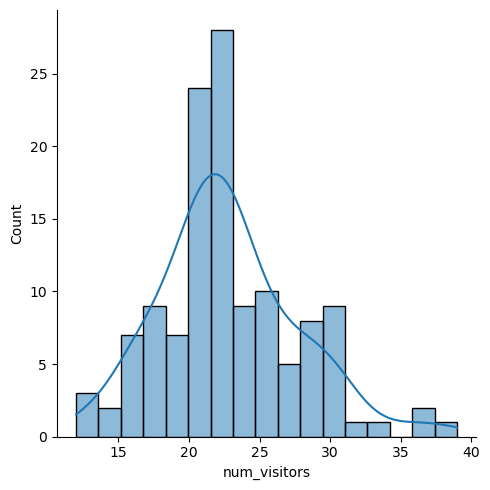

In [66]:
sns.displot(df_place.num_visitors, kde=True, label='Banyak pengunjung', bins=17)

<h3>a. Hal apa yang mempengaruhi banyaknya kunjungan wisatawan?</h3>

Untuk mengetahui faktor faktornya kita dapat melakukan korelasi terhadap jumlah kunjungan dengan data lainnya. Dalam perhitungan korelasi dilakukan dengan metode spearman karena data jumlah kunjungan masih memiliki outlier sehinggal lebih baik menggunakan spearman yang tidak sensitif terhadap outlier

In [67]:
def spearman_corr(col1, col2):
  '''
  fungsi untuk menghitung korelasi antara dua data dengan motode spearmann,
  fungsi memiliki input berupa series data 1 dan data 2 yang akan dihitung korelasinya.
  '''
  res = stats.spearmanr(col1,col2)
  rho = res.statistic
  pval = res.pvalue
  print(f'spearman rho: {rho: .5f}')
  print(f'P-value: {pval: .5f}')

In [68]:
spearman_corr(df_place['Price'], df_place['num_visitors'])

spearman rho:  0.00522
P-value:  0.95371


In [69]:
spearman_corr(df_place['Rating'], df_place['num_visitors'])

spearman rho: -0.00527
P-value:  0.95329


In [70]:
spearman_corr(df_place['Distance'], df_place['num_visitors'])

spearman rho: -0.06316
P-value:  0.48228


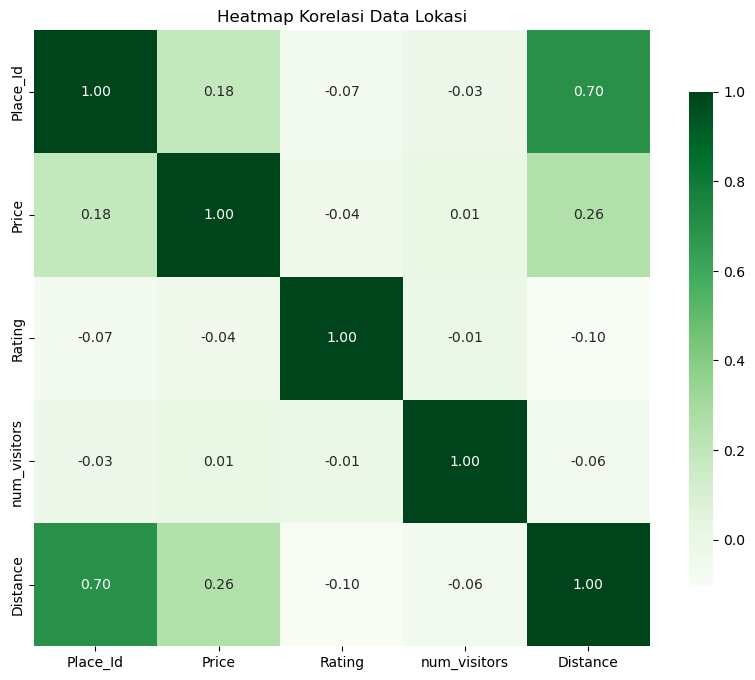

In [71]:
cols = df_place.drop(columns=['Place_Name', 'Category', 'City','Latitude', 'Longitude'])
# Menghitung matriks korelasi
correlation_matrix = cols.corr(method= 'spearman')

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Data Lokasi')
plt.show()

Dari hasil perhitungan korelasi antara jumlah pengunjung dengan data price, rating dan distance menunjukkan jika semua data berkorelasi rendah dengan jumlah visitor. Bisa disimpulkan jika data price, rating dan distance tidak mempengaruhi banyaknya wisatawan yang datang pada suatu lokasi.

<h3>b. Wisatawan dari mana yang banyak melakukan kunjungan?</h3>

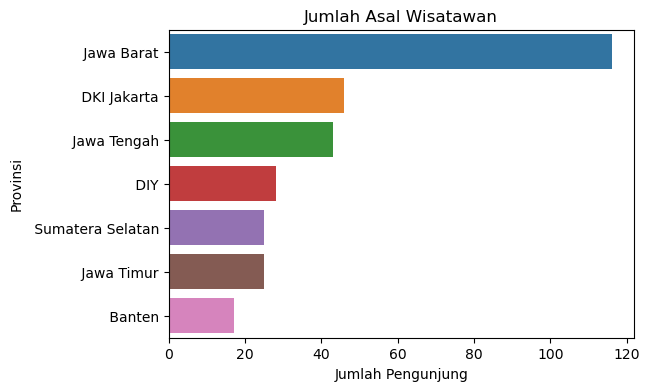

In [78]:
# Menghitung jumlah pengunjung per provinsi
provinsi_counts = df_user['Provinsi'].value_counts().reset_index()
provinsi_counts.columns = ['Provinsi', 'Jumlah_Pengunjung']

# Mengurutkan berdasarkan jumlah pengunjung
provinsi_counts = provinsi_counts.sort_values(by='Jumlah_Pengunjung', ascending=False)

# Membuat grafik countplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Jumlah_Pengunjung', y='Provinsi', data=provinsi_counts, hue= 'Provinsi')  # Menggunakan barplot untuk urutan
plt.title('Jumlah Asal Wisatawan')
plt.xlabel('Jumlah Pengunjung')
plt.ylabel('Provinsi')
plt.show()

Wisatawan yang banyak berkunjung yaitu dari Provinsi Jawa Barat

<h3>c. Bagaimana persebaran kunjungan wisatawan disetiap kategori?</h3>

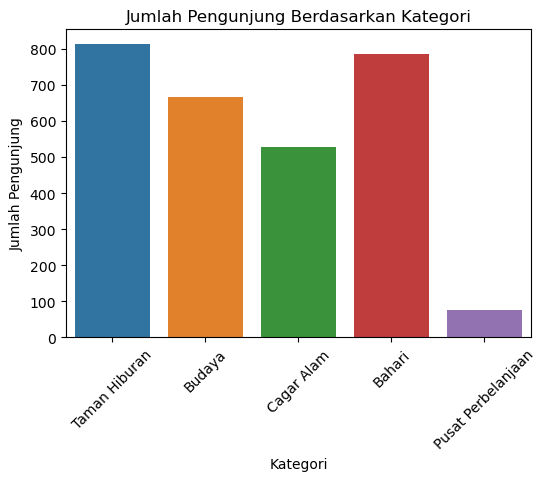

In [80]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='num_visitors', data=df_place, estimator=sum, errorbar=None, hue='Category')
plt.title('Jumlah Pengunjung Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=45)
plt.show()

Terdapat perbedaan signifikan jumlah pengunjung pada kotegori pusat perbelanjaan.

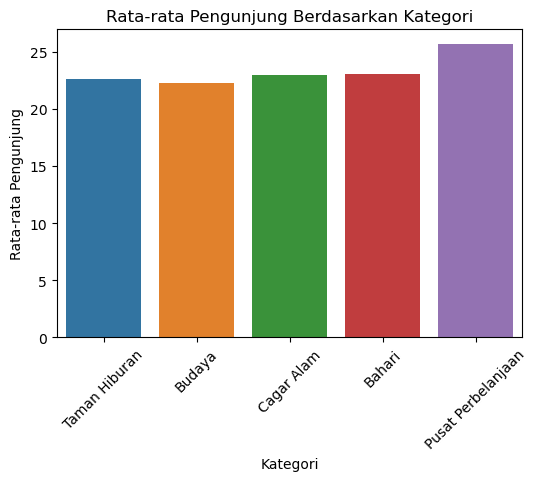

In [81]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='num_visitors', data=df_place, estimator=np.mean, errorbar=None, hue='Category')
plt.title('Rata-rata Pengunjung Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Pengunjung')
plt.xticks(rotation=45)
plt.show()

Jika dilihat dari rata-rata pengunjung setiap kategori ternyata hasilnya tidak berbeda jauh berbeda, bahkan pusat perbelanjaan memiliki rata-rata yang paling tinggi.

<h3>d. Berapa jumlah tempat wisata setiap kategori?</h3>

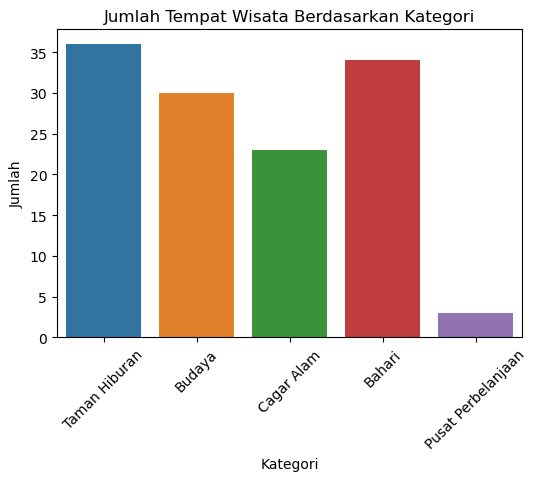

In [84]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df_place, hue='Category')
plt.title('Jumlah Tempat Wisata Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Terlihat jika pusat perbelanjaan memiliki jumlah lokasi yang jauh lebih sedikit dengan kategori lainnya. Hal ini sejalan dengan jumlah pengunjung pusat perbelanjaan yang lebih sedikit juga dari yang lain. Hal ini bisa menjadi faktor penyebab kecilnya angka kunjungan wisatawan di pusat perbelanjaan.<br> 
Sedangkan untuk kategori terbanyak yaitu Taman hiburan.

<h3>e. Apakah terdapat karakteristik wisatawan yang spesifik di setiap kategori tempat?</h3>

Melihat korelasi antar kolom untuk menentukan uji hipotesis yang sesuai.

In [32]:
encoder = OrdinalEncoder()
df_rating['Provinsi'] = encoder.fit_transform(df_rating[['Provinsi']])
budaya = df_rating[df_rating['Category'] == 'Budaya']
bahari = df_rating[df_rating['Category'] == 'Bahari']
taman = df_rating[df_rating['Category'] == 'Taman Hiburan']
cagar_alam = df_rating[df_rating['Category'] == 'Cagar Alam']
market = df_rating[df_rating['Category'] == 'Pusat Perbelanjaan']


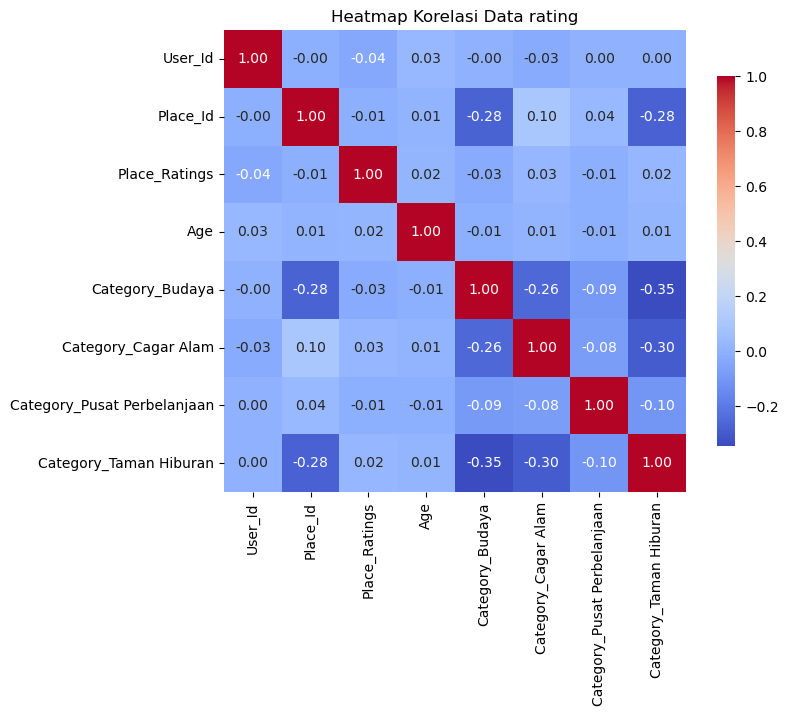

In [33]:
# Menggunakan pd.get_dummies untuk mengubah data kategori menjadi numerik
df_encoded = pd.get_dummies(df_rating, columns=['Category'], drop_first=True)
df_encoded.drop(columns=['Kota', 'Provinsi'], inplace = True)


# Menghitung matriks korelasi
correlation_matrix = df_encoded.corr(method='kendall')

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Data rating')
plt.show()

In [34]:
cols = df_rating.drop(columns=['Category']).columns

for col in cols:
  cross = pd.crosstab(df_rating[col],df_rating['Category'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "and they are dependent" if pval<0.05 else ""
  print(f"P-value of {col} and kategori: {pval} {prompt}")

P-value of User_Id and kategori: 0.0744925172765578 
P-value of Place_Id and kategori: 0.0 and they are dependent
P-value of Place_Ratings and kategori: 0.5268221993094271 
P-value of Age and kategori: 0.8767323991667805 
P-value of Kota and kategori: 0.43660271198405975 
P-value of Provinsi and kategori: 0.7300728514212484 


Dari hasil perhitungan korelasi dan Chi-Squared Test menunjukkan data user_id, place_rating, Age, kota, provinsi merupakan data yang tidak berkorelasi dengan category atau independent.

Jadi dapat dilakukan anova test untuk mengetahui variance dari data pengunjung yang ada pada setiap kategori.<br>
Pertama membadingkan variance data umur pengunjung untuk setiap kategori dengan hipotesis :<br>
H0 : Tidak ada perbedaan yang signifikan di antara rata-rata umur setiap kategori.<br>
H1 : Setidaknya ada satu kelompok yang berbeda secara signifikan.

In [35]:
res = stats.f_oneway(budaya['Age'], bahari['Age'], taman['Age'], cagar_alam['Age'], market['Age'])
print('P-value:',res.pvalue)

P-value: 0.6345106688189772


Nilai P-value dari perhitungan anova > 0.05 maka H0 diterima. Jadi rata-rata umur dari setiap pengunjung perkategori memiliki kesamaan. Ini mengindikasikan variasi persebaran pengunjung ke setiap kategori tempat wisata memiliki kesamaan satu dengan yang lainnya.

Variance yang kedua yaitu provinsi asal pengunjung dengan hipotesis: <br>
H0 : Tidak ada perbedaan variasi provinsi asal pengunjung untuk setiap kategori.<br>
H1 : Setidaknya terdapat satu perbedaan variasi provinsi asal pengunjung untuk setiap kategori.

In [36]:
res = stats.f_oneway(budaya['Provinsi'], bahari['Provinsi'], taman['Provinsi'], cagar_alam['Provinsi'], market['Provinsi'])
print('P-value:',res.pvalue)

P-value: 0.9386737761199957


Nilai p-value hasil perhitungan > 0.05 maka H0 diterima. Jadi variasi pengunjung berdasarkan asal provinsi pengunjung pada setiap kategori dipastikan sama.

<h3>f. Di mana saja tempat wisata yang memiliki kunjungan 5 tertinggi dan 5 terendah?</h3>

Keseluruhan

<Figure size 1200x600 with 0 Axes>

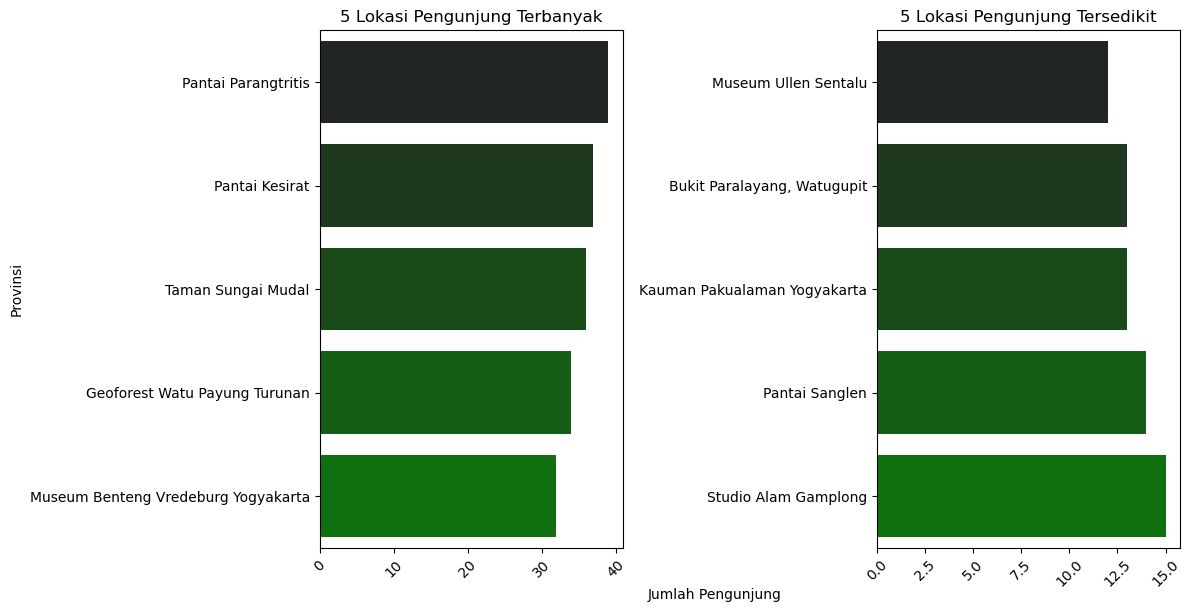

In [37]:
# Mengurutkan berdasarkan jumlah pengunjung
top5_all = df_place.sort_values(by='num_visitors', ascending=False).head()
bot5_all = df_place.sort_values(by='num_visitors', ascending=True).head()

plt.figure(figsize=(12, 6))
# Membuat subplot 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=top5_all, palette='dark:green',hue='Place_Name', ax=axs[0])  # Menggunakan barplot untuk urutan
axs[0].set_title('5 Lokasi Pengunjung Terbanyak')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Provinsi')
axs[0].tick_params(axis='x', rotation=45)
# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=bot5_all, palette='dark:green',hue='Place_Name', ax=axs[1])  # Menggunakan barplot untuk urutan
axs[1].set_title('5 Lokasi Pengunjung Tersedikit')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
axs[1].tick_params(axis='x', rotation=45)

fig.text(0.6, 0, 'Jumlah Pengunjung', ha='center', va='center')


plt.tight_layout()
plt.show()

Lima tempat terpopuler secara keseluruhan yaitu Pantai Paranngtritis, Pantai Kesirat, Taman Sungai Mudal, Geoforest Watu Payung Turunan, Museum Benteng Vredeburg Yogyakarta. <br>
Lima tempat kurang populer secara keseluruhan  Museum Ullen Sentalu, Bukit Paralayang, Watugupit, Kauman Pakualaman Yogyakarta, Pantai Sanglen, Studio Alam Gamplong

<h3>Setiap kategori</h3>

In [38]:
budaya = df_place[df_place['Category'] == 'Budaya']
bahari = df_place[df_place['Category'] == 'Bahari']
taman = df_place[df_place['Category'] == 'Taman Hiburan']
cagar_alam = df_place[df_place['Category'] == 'Cagar Alam']
market = df_place[df_place['Category'] == 'Pusat Perbelanjaan']


<h4>Budaya</h4>

<Figure size 1200x600 with 0 Axes>

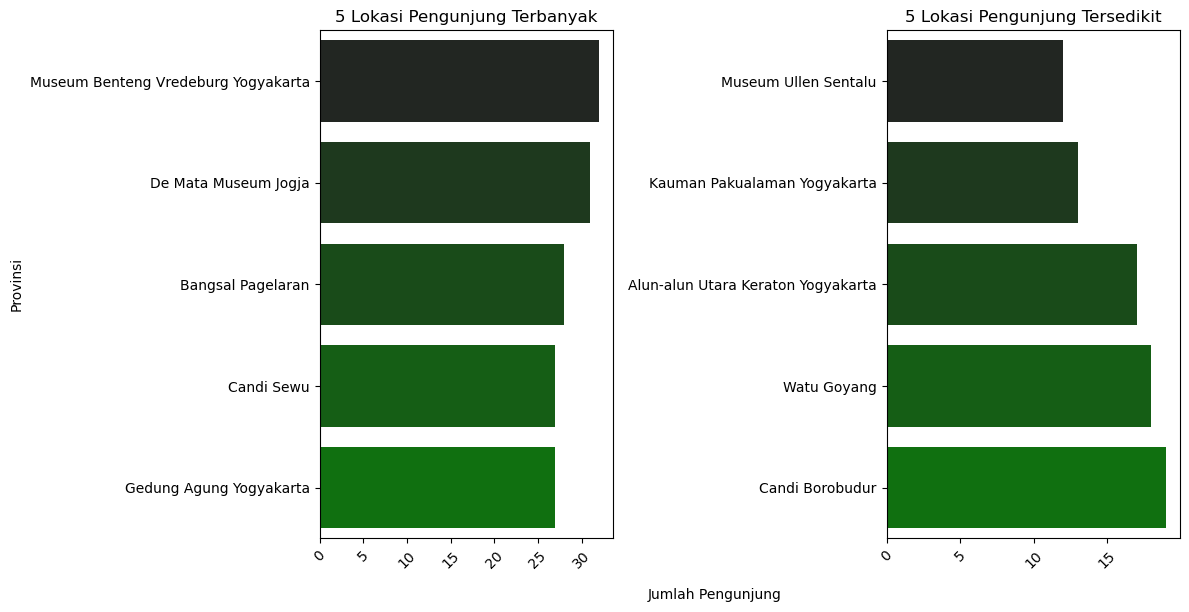

In [39]:
# Mengurutkan berdasarkan jumlah pengunjung
top5_all = budaya.sort_values(by='num_visitors', ascending=False).head()
bot5_all = budaya.sort_values(by='num_visitors', ascending=True).head()

plt.figure(figsize=(12, 6))
# Membuat subplot 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=top5_all, palette='dark:green',hue='Place_Name', ax=axs[0])  # Menggunakan barplot untuk urutan
axs[0].set_title('5 Lokasi Pengunjung Terbanyak')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Provinsi')
axs[0].tick_params(axis='x', rotation=45)
# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=bot5_all, palette='dark:green',hue='Place_Name', ax=axs[1])  # Menggunakan barplot untuk urutan
axs[1].set_title('5 Lokasi Pengunjung Tersedikit')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
axs[1].tick_params(axis='x', rotation=45)

fig.text(0.6, 0, 'Jumlah Pengunjung', ha='center', va='center')


plt.tight_layout()
plt.show()

Lima lokasi yang terpopuler pada kategori budaya yaitu Museum Benteng Vredeburg Yogyakarta, De Mata Museum Jogja, Bangsal Pagelaran, Candi Sewu, Gedung Agung Yogyakarta. <br>
Lima lokasi kurang populer pada kategori budaya yaitu Museum Ullen Sentalu, Kauman Pakualaman Yogyakarta, Alun-alun Utara Keraton Yogyakarta, Watu Goyang, Candi Borobudur.

<h4>Bahari</h4>

<Figure size 1200x600 with 0 Axes>

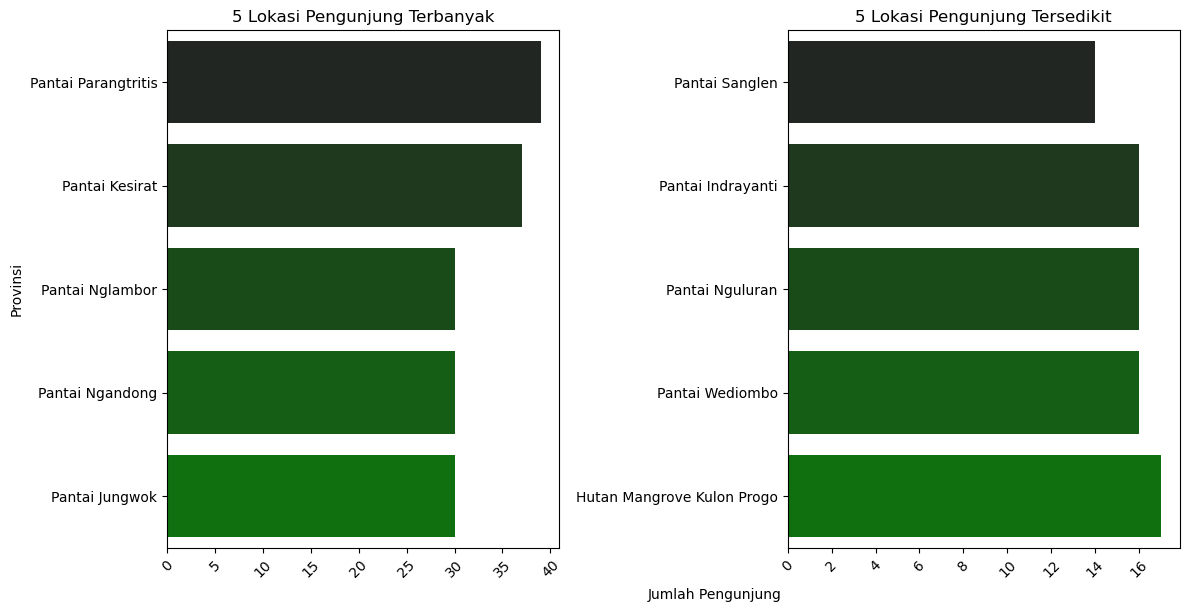

In [40]:
# Mengurutkan berdasarkan jumlah pengunjung
top5_all = bahari.sort_values(by='num_visitors', ascending=False).head()
bot5_all = bahari.sort_values(by='num_visitors', ascending=True).head()

plt.figure(figsize=(12, 6))
# Membuat subplot 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=top5_all, palette='dark:green',hue='Place_Name', ax=axs[0])  # Menggunakan barplot untuk urutan
axs[0].set_title('5 Lokasi Pengunjung Terbanyak')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Provinsi')
axs[0].tick_params(axis='x', rotation=45)
# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=bot5_all, palette='dark:green',hue='Place_Name', ax=axs[1])  # Menggunakan barplot untuk urutan
axs[1].set_title('5 Lokasi Pengunjung Tersedikit')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
axs[1].tick_params(axis='x', rotation=45)

fig.text(0.6, 0, 'Jumlah Pengunjung', ha='center', va='center')


plt.tight_layout()
plt.show()

Lima lokasi terpopuler dalam kategori bahari yaitu Pantai Parangtritis, Pantai Kesirat, Pantai Nglambor, Pantai Ngandong, Pantai Jungwok.<br>
Lima lokasi kurang populer dalam kategori bahari yaitu Pantai Sanglen, Pantai Indrayanti, Pantai Nguluran, Pantai Wediombo, Hutan Mangrove Kulon Progo.

<h4>Taman Hiburan</h4>

<Figure size 1200x600 with 0 Axes>

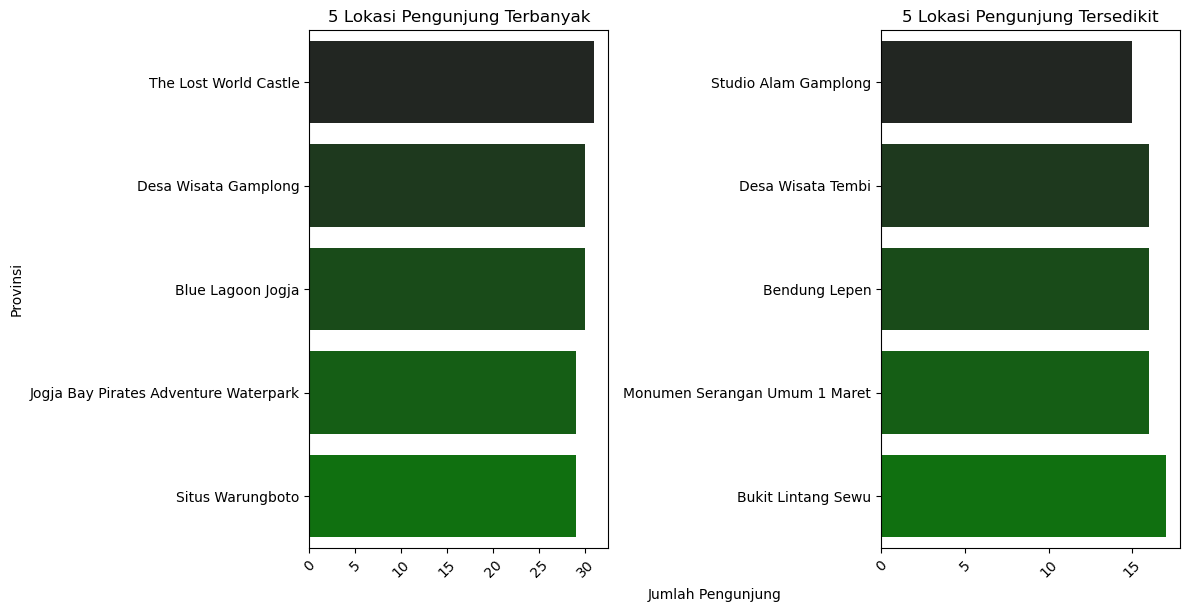

In [41]:
# Mengurutkan berdasarkan jumlah pengunjung
top5_all = taman.sort_values(by='num_visitors', ascending=False).head()
bot5_all = taman.sort_values(by='num_visitors', ascending=True).head()

plt.figure(figsize=(12, 6))
# Membuat subplot 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=top5_all, palette='dark:green',hue='Place_Name', ax=axs[0])  # Menggunakan barplot untuk urutan
axs[0].set_title('5 Lokasi Pengunjung Terbanyak')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Provinsi')
axs[0].tick_params(axis='x', rotation=45)
# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=bot5_all, palette='dark:green',hue='Place_Name', ax=axs[1])  # Menggunakan barplot untuk urutan
axs[1].set_title('5 Lokasi Pengunjung Tersedikit')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
axs[1].tick_params(axis='x', rotation=45)

fig.text(0.6, 0, 'Jumlah Pengunjung', ha='center', va='center')


plt.tight_layout()
plt.show()

Lima lokasi terpopuler dalam kategori taman hiburan yaitu The Lost World Castle, Desa Wisata Gamplong, Blue Lagoon Jogja, Jogja Bay Pirates Adventure Waterpark, Situs Warungboto.<br>
Lima lokasi kurang populer dalam kategori taman hiburan yaitu Studio Alam Gamplong, Desa Wisata Tembi, Bendung Lepen, Monumen Serangan Umum 1 Maret, Bukit Lintang Sewu.

<h4>Cagar Alam</h4>

<Figure size 1200x600 with 0 Axes>

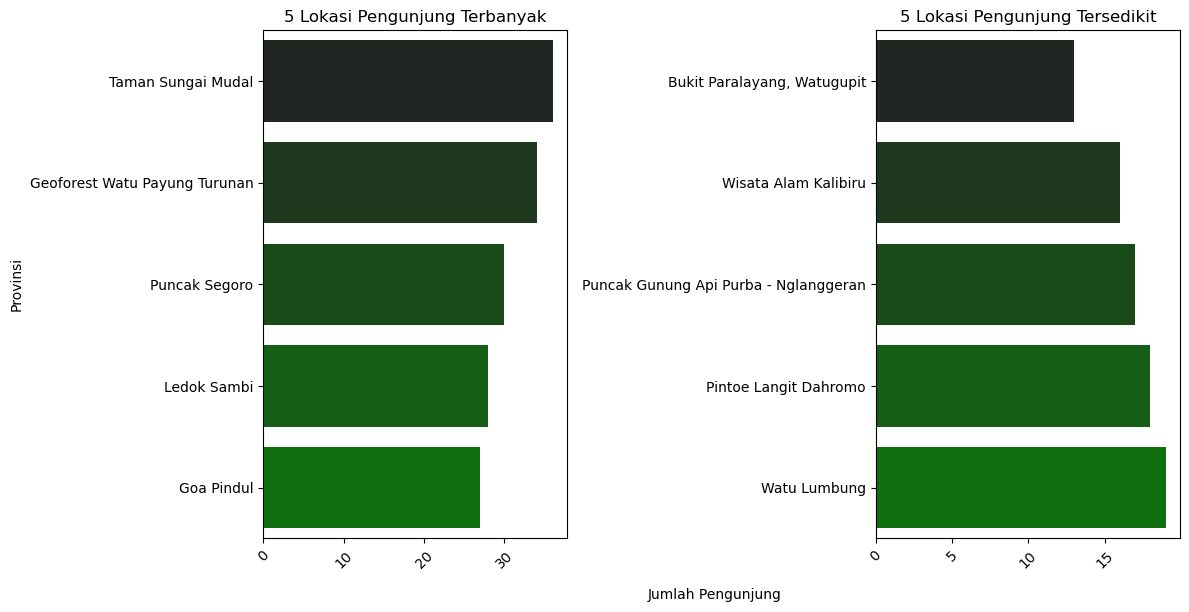

In [42]:
# Mengurutkan berdasarkan jumlah pengunjung
top5_all = cagar_alam.sort_values(by='num_visitors', ascending=False).head()
bot5_all = cagar_alam.sort_values(by='num_visitors', ascending=True).head()

plt.figure(figsize=(12, 6))
# Membuat subplot 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=top5_all, palette='dark:green',hue='Place_Name', ax=axs[0])  # Menggunakan barplot untuk urutan
axs[0].set_title('5 Lokasi Pengunjung Terbanyak')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Provinsi')
axs[0].tick_params(axis='x', rotation=45)
# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=bot5_all, palette='dark:green',hue='Place_Name', ax=axs[1])  # Menggunakan barplot untuk urutan
axs[1].set_title('5 Lokasi Pengunjung Tersedikit')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
axs[1].tick_params(axis='x', rotation=45)

fig.text(0.6, 0, 'Jumlah Pengunjung', ha='center', va='center')


plt.tight_layout()
plt.show()

Lima lokasi terpopuler dalam kategori taman hiburan yaitu Taman Sungai Mudal, Geoforest Watu Payung Turunan, Puncak Segoro, Ledok Sambi, Goa Pindul.<br>
Lima lokasi kurang populer dalam kategori taman hiburan yaitu Bukit Paralayang, Watugupit, Wisata Alam Kalibiru, Puncak Gunung Api Purba - Nglanggeran, Pintoe Langit Dahromo, Watu Lumbung.

<h3>Pusat Perbelanjaan</h3>

<Figure size 1200x600 with 0 Axes>

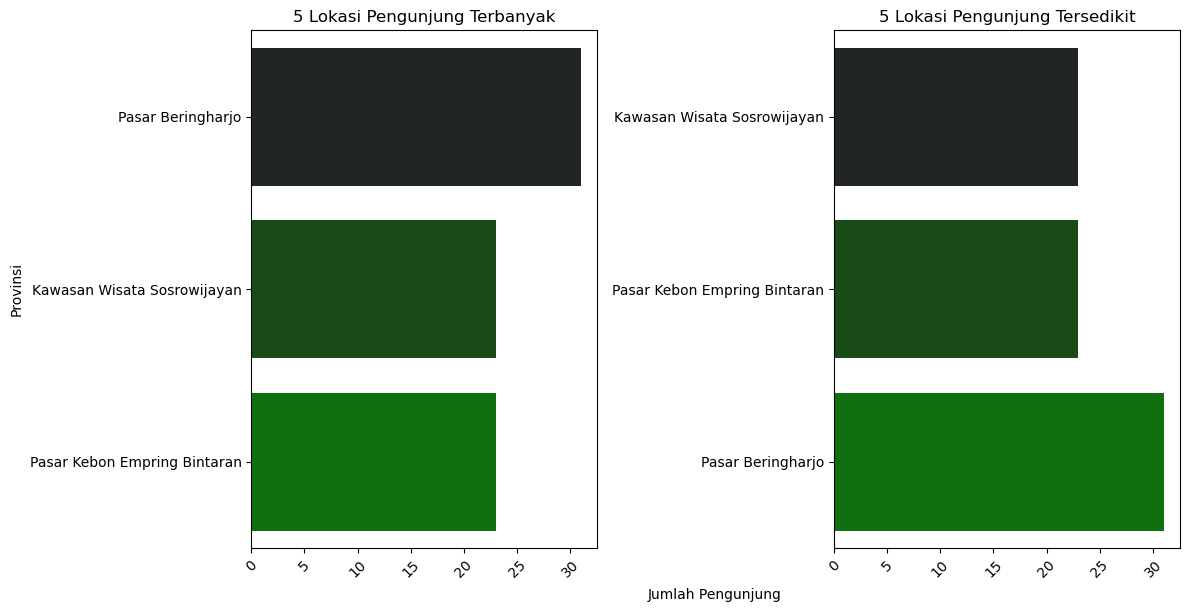

In [43]:
# Mengurutkan berdasarkan jumlah pengunjung
top5_all = market.sort_values(by='num_visitors', ascending=False).head()
bot5_all = market.sort_values(by='num_visitors', ascending=True).head()

plt.figure(figsize=(12, 6))
# Membuat subplot 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=top5_all, palette='dark:green',hue='Place_Name', ax=axs[0])  # Menggunakan barplot untuk urutan
axs[0].set_title('5 Lokasi Pengunjung Terbanyak')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Provinsi')
axs[0].tick_params(axis='x', rotation=45)
# Subplot untuk top 5
sns.barplot(x='num_visitors', y='Place_Name', data=bot5_all, palette='dark:green',hue='Place_Name', ax=axs[1])  # Menggunakan barplot untuk urutan
axs[1].set_title('5 Lokasi Pengunjung Tersedikit')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
axs[1].tick_params(axis='x', rotation=45)

fig.text(0.6, 0, 'Jumlah Pengunjung', ha='center', va='center')


plt.tight_layout()
plt.show()

Karena pusat perbelanjaan hanya terdapat tiga lokasi jadi urutan lokasi paling populer yaitu Pasar beringharjo, Kawasan Wisata Sosrowijayan, Pasar Kebon Emping Bintaran

<h1>6. Pengambilan Kesimpulan</h1>

a. Dari data yang tersedia tidak ada data yang mempengaruhi kujungan wisatawan. Perhitungan korelasi terhadap data yang dimiliki menunjukan jumlah kunjungan suatu lokasi tidak memiliki korelasi yang kuat dengan mayoritas data yang dimiliki. Sehingga faktor yang mempengaruhi kunjungan tidak dapat ditentukan dari data yang ada. Perlu mengumpulkan data yang lebih dalam lagi untuk mengetahui preferensi dari wisatawan.<br><br>
b. Wisatawan yang berkunjung kebanyakan dari daerah Jawa Barat, Jakarta, dan luar provinsi lainnya. Hal ini perlu diantisipasi dengan keterjaminan adanya penginapan di Yogyakarta yang nyaman dan memadai. Karena wisatawan dari luar provinsi memiliki kecenderungan untuk berlibur lebih dari satu hari sehingga memerlukan penginapan. Dan juga perlu disiapkan akses menuju lokasi wisata yang baik dan jelas, karena wisatawan tidak familiar dengan rute yang harus ditempuh sehingga perlu memperjelas rute ke lokasi dan keamanan dari rutenya.<br><br>
c. Persebaran kunjungan wisatawan pada kategori taman hiburan sebanyak 813 orang, bahari sebanyak 785 orang, budaya sebanyak 667 orang, cagar alam sebanyak 528 orang, dan pusat perbelanjaan sebanyak 77 orang. Dari hasil plot data persebaran wisatawan sesuai dengan kategori terlihat jika pusat perbelanjaan menjadi kategori yang sangat rendah tingkat kunjungannya. Namun jika dilihat lagi dari rata-rata kunjungan setiap lokasi menunjukkan pusat perbelanjaan memiliki rata-rata yang paling tinggi. Hal ini menandakan rendahnya tingkat kunjungan bukan karena pusat perbelanjaan tidak menarik bagi wisatawan.  <br><br>
d. Jumlah tempat wisata berdasarkan kategori yaitu taman hiburan sebanyak 36 lokasi, bahari sebanyak 34 lokasi, budaya sebanyak 30 lokasi, cagar alam sebanyak 23 lokasi, taman hiburan sebanyak 3 lokasi. Jumlah lokasi wisata setiap kategori ini memperlihatkan pusat perbelanjaan memiliki jumlah paling sedikit yaitu tiga lokasi saja. Dan juga persebaran dari pusat perbelanjaan diliahat dari chart map di tableau tidak luas hanya di sekitaran pusat kota. Jumlah ini menguatkan analisa pada poin c jika rendahnya kunjungan pusat perbelanjaan bukan karena kategori yang tidak menarik. Untuk meningkatkan kunjungan dan meningkatkan juga aktifitas ekonomi di lokasi ini sebaiknya ditambah lagi jumlah lokasi pusat perbelanjaan dan persebarannya lebih merata lagi. Lebih dekat dengan lokasi wisata lainnya akan baik untuk meningkatkan kunjungan dan memudahkan wisatawan dalam melakukan aktifitas belanja. <br><br>
e. Untuk meningkatkan kunjungan secara keseluruhan perlu diketahui terlebih dahulu karakter dari wisatawan terhadap setiap kategori tempat wisata. Dilihat dari hasil uji hipotesis terhadap data wisatawan dengan motode anova terlihat kesamaan karakter wisatawan di setiap kategorinya. Ini menunjukkan bahwa pengunjung dari berbagai latar belakang memiliki preferensi yang serupa dalam memilih tempat wisata. Jadi strategi untuk menambah kunjungan dapat diaplikasikan ke semua kategori juga. langkah-langkah strategis yang dapat dilakukan untuk menambah kunjungan wisatawan seperti lebih gencar melakukan pengenalan tempat wisata yang potensial namun masih rendah tingkat kujungannya. Pengenalan bisa melalui promosi dengan media sosial atau dilakukan event untuk menarik kunjungan sesuai dengan tema lokasi wisata. <br><br>
f. Tempat wisata terbanyak yang dikunjungi pengunjung secara keseluruhan dan setiap kategori jika dilihat polanya secara data yang ada memang tidak ada faktor kuat yang dapat mempengaruhi kunjungan. Namun jika berbicara di luar data ada beberapa kemiripan dari lokasi yang populer. Yang pertama lokasi wisata yang memang sejak dahulu merupak icon wisata Yogyakarta seperti Pantai parangtritis, candi sewu, gedung agung. Ke dua tempat wisata yang sedang viral di media sosial karena postingan pengunjung atau emang promosi dari pengelola, hal ini terjadi di mayoritas tempat terpopuler dalam data ini. Ke tiga lokasi yang memiliki layout atau konsep baru yaitu Museum Benteng Vredeburg Yogyakarta, Pantai Nglambor. Dari hal ini diharapkan pengelola objek wisata selalu berinovasi dan selalu merawat lokasi wisata dengan baik. Dan juga aktif mengajak pengunjung untuk mengeshare pengalamannya berlibur di lokasi tertentu ke media sosial. caranya bisa memberi suvenir jika posting di media sosial, atau menyediakan template menarik di lokasi, atau memberikan diskon, dan sebagainya.
